In [63]:
import torch
import torch.nn as nn
import torch.optim as opt
from torchvision import datasets, transforms

In [64]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [65]:
# MNIST 데이터 셋
train_dataset = datasets.MNIST(root='data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='data',
                              train=True,
                              transform=transforms.ToTensor(),
                              download=True)

In [66]:
print('==================')
print(train_dataset)
print('==================')
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [67]:
# 데이터 로더
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = 32,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = 32,
                                          shuffle=False)

In [68]:
images, labels = next(iter(train_loader))
print(labels)

tensor([5, 2, 7, 2, 6, 7, 6, 5, 0, 5, 4, 8, 0, 4, 4, 6, 0, 2, 9, 2, 7, 5, 6, 8,
        0, 2, 1, 1, 2, 2, 8, 9])


In [69]:
print(images.shape)             # b,c,h,w
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


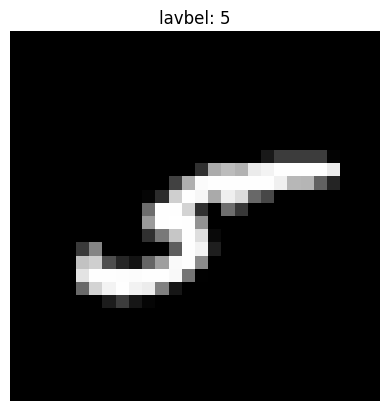

torch.Size([28, 28])


In [70]:
import matplotlib.pyplot as plt

img = images[0].squeeze()
label = labels[0]

plt.imshow(img, cmap='gray')
plt.title(f'lavbel: {label.item()}')
plt.axis('off')
plt.show()
print(img.shape)

In [71]:
# MLP 모델
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_cls):
        super(MLP, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()

        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()

        self.output = nn.Linear(hidden_size, num_cls)

    def forward(self, x):
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l2(x)
        x = self.relu2(x)
        out = self.output(x)
        return out

In [74]:
class CNN(nn.Module):
    def __init__(self, input_ch, hidden_size, num_cls):
        super(CNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(input_ch, hidden_size, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(hidden_size, hidden_size, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(hidden_size, input_ch, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten()
        self.output = nn.Linear(784, num_cls)

    def forward(self, x):
         x = self.block1(x)
         x = self.block2(x)
         x = self.block3(x)

         x = self.flatten(x)
         out = self.output(x)

         return out

In [75]:
input_size = 784
hidden_size = 500
num_cls = 10
epochs = 3

# model = MLP(input_size, hidden_size, num_cls).to(device)

# input_ch, hidden_size, num_cls
model = CNN(1, 16, 10).to(device)

loss_fn = nn.CrossEntropyLoss()
optim = opt.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 데이터를 디바이스로 이동
        # images = images.reshape(-1,input_size)
        images = images.to(device)
        labels = labels.to(device)

        # 모델을 실행
        outputs = model(images).squeeze()
        loss = loss_fn(outputs,labels)

        # 역전파 & 옵티마이저
        optim.zero_grad()
        loss.backward()
        optim.step()

        if (i + 1) % 100 ==0:
            print(f"Epoch : {epoch}, loss : {loss}")

Epoch : 0, loss : 0.5135955214500427
Epoch : 0, loss : 0.613960862159729
Epoch : 0, loss : 0.6421759724617004
Epoch : 0, loss : 0.4503188729286194
Epoch : 0, loss : 0.20363962650299072
Epoch : 0, loss : 0.3088517487049103
Epoch : 0, loss : 0.3265736699104309
Epoch : 0, loss : 0.5302112698554993
Epoch : 0, loss : 0.2342010736465454
Epoch : 0, loss : 0.5865956544876099
Epoch : 0, loss : 0.10858413577079773
Epoch : 0, loss : 0.15870897471904755
Epoch : 0, loss : 0.1618610918521881
Epoch : 0, loss : 0.39416080713272095
Epoch : 0, loss : 0.36330699920654297
Epoch : 0, loss : 0.10163543373346329
Epoch : 0, loss : 0.3339563310146332
Epoch : 0, loss : 0.1879258006811142
Epoch : 1, loss : 0.49952834844589233
Epoch : 1, loss : 0.26856860518455505
Epoch : 1, loss : 0.3045459985733032
Epoch : 1, loss : 0.16178031265735626
Epoch : 1, loss : 0.15428748726844788
Epoch : 1, loss : 0.3088834285736084
Epoch : 1, loss : 0.28905755281448364
Epoch : 1, loss : 0.21744051575660706
Epoch : 1, loss : 0.4381471

In [76]:
print(model)

CNN(
  (block1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block3): Sequential(
    (0): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (output): Linear(in_features=784, out_features=10, bias=True)
)


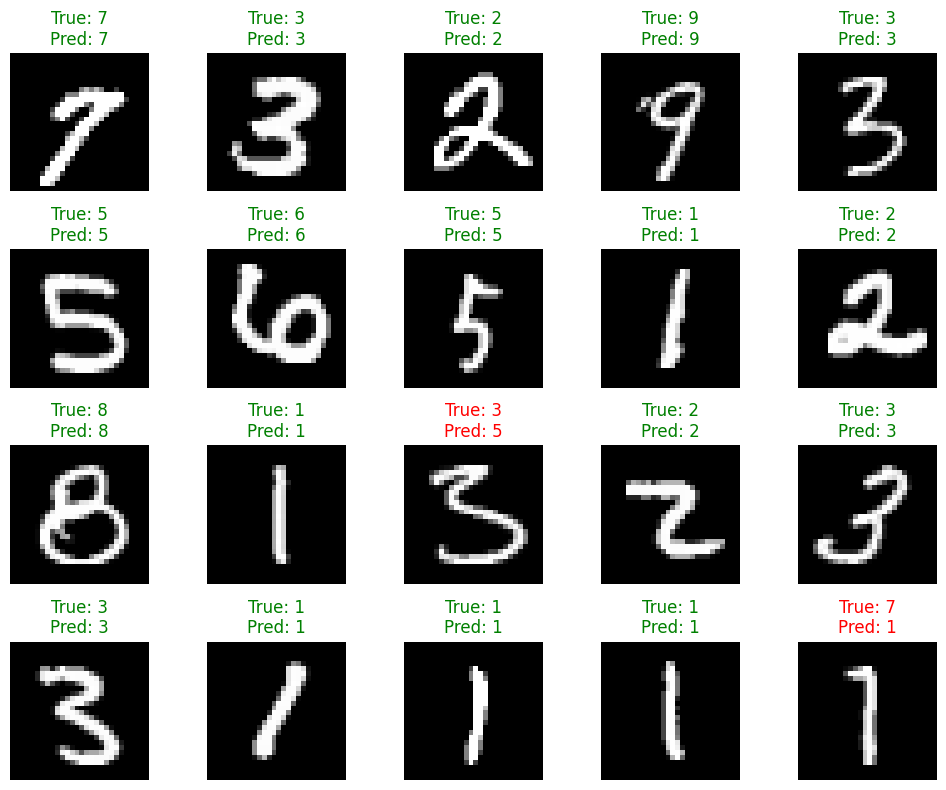

In [79]:
# prompt: 테스트 셋에서 20개정도 샘플을 추출해서 결과를 표시해

import matplotlib.pyplot as plt
import numpy as np

# 테스트 셋에서 20개 샘플 추출
sample_indices = np.random.choice(len(test_dataset), 20, replace=False)
sampled_images = [test_dataset[i][0] for i in sample_indices]
sampled_labels = [test_dataset[i][1] for i in sample_indices]

# 모델 예측
model.eval()  # 평가 모드로 설정
predicted_labels = []
with torch.no_grad():
  for image in sampled_images:
    #image = image.reshape(-1, input_size).to(device)
    image = image.to(device)
    output = model(image).argmax()
    predicted_labels.append(output.item())

# 결과 시각화
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(sampled_images[i].squeeze().numpy(), cmap='gray')
  ax.set_title(f'True: {sampled_labels[i]}\nPred: {predicted_labels[i]}',
               color='green' if sampled_labels[i] == predicted_labels[i] else 'red')
  ax.axis('off')
plt.tight_layout()
plt.show()